In [1]:
# 1. Investigating IKEA Furniture Dataset¶
# Table of Contents
# Introduction
# Data Wrangling
# Exploratory Data Analysis
# Conclusions
# 2. Predicting IKEA's features
# Table of Contents
# Introduction
# Imports and preperations
# Model 1
# Model 2
# Conclusions

# Introduction
# Context:
# This dataset is a practice of web scraping techniques. The web scraping has been applied on IKEA Saudi Arabian website for the furniture category. The scraped website link: https://www.ikea.com/sa/en/cat/furniture-fu001/

# The data requested by 4/20/2020.
# dataset: https://www.kaggle.com/ahmedkallam/ikea-sa-furniture-web-scraping

# Content:
# item_id : item id wich can be used later to merge with other IKEA dataframes
# name: the commercial name of items
# category:the furniture category that the item belongs to (Sofas, beds, chairs, Trolleys,…)
# Price: the current price in Saudi Riyals as it is shown in the website by 4/20/2020
# old_price: the price of item in Saudi Riyals before discount
# Short_description: a brief description of the item
# full_Description: a very detailed description of the item. Because it is long, it is dropped from the final dataframe, but it is available in the code in case it needs to be analyzed.
# designer: The name of the designer who designed the item. this is extracted from the full_description column.
# size: the dimensions of the item including a lot of details.As a lot of dimensions mentioned and they vary from item to item, the most common dimensions have been extracted which are: Height, Wideh, and Depth. This column is dropped from the final dataframe, but it is available in the code in case it is needed.
# width: Width of the item in Centimeter
# height: Height of the item in Centimeter
# depth: Depth of the item in Centimeter
# sellable_Online: if the item is available for online purchasing or in-stores only (Boolean)
# other_colors: if other colors are available for the item, or just one color as displayed in the website (Boolean)
# link: the web link of the item
# Licences:
# The scraped website link: https://www.ikea.com/sa/en/cat/furniture-fu001/

In [2]:
# Importing and Loading data¶
# # 

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *


%matplotlib inline

In [4]:
df = pd.read_csv('IKEA_SA_Furniture_Web_Scrapings_sss.csv',  index_col=0)

In [5]:
# pip install plotnine


Note: you may need to restart the kernel to use updated packages.


In [6]:
df.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [7]:
# Data Wrangling¶
# # 

In [8]:
df.describe()

,item_id,price,depth,height,width
count,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


In [9]:
# max value of price might be an indication of an outlier, a visualization will indicate more.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              2231 non-null   float64
 11  height             2706 non-null   float64
 12  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 378.8+ KB


In [11]:
# hug amount of null values in the depth height and width features
# old_price is an object, might required more looking

In [12]:
df.nunique()

item_id              2962
name                  607
category               17
price                 979
old_price             365
sellable_online         2
link                 2962
other_colors            2
short_description    1706
designer              381
depth                 114
height                193
width                 263
dtype: int64

In [13]:
# All features have a variance of unique values but category, sellable_online, and other_colors could be useful in the analysis


In [14]:
df.duplicated().sum()

0

In [15]:
# Investigating Quantitative values¶


In [16]:
df['category'].value_counts()

Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Café furniture                           26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: category, dtype: int64

In [17]:
# old_price feature needs some modifications:
# remove the "SR " string
# Change the "No old price" to the same price as now
# make it float

In [18]:
df.category.unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

In [19]:
df.other_colors.unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df.sellable_online.unique()

array([ True, False])

In [21]:
# Investigating Old Price¶
# Add new column for if an Item discounted or not (todo)

In [22]:
df.old_price.unique()[:20]

array(['No old price', 'SR 2,375', 'SR 295', 'SR 175', 'SR 995',
       'SR 1,385', 'SR 445', 'SR 925', 'SR 2,205', 'SR 895', 'SR 2,435',
       'SR 125', 'SR 1,595', 'SR 2,880', 'SR 940', 'SR 800', 'SR 1,995',
       'SR 3,245', 'SR 8,735', 'SR 2,310'], dtype=object)

In [23]:
def fix_old_price(df):
    '''modify old_price feature'''
    
    if df['old_price']  == 'No old price':
        return df['price']

    elif df['old_price'][-4:] != 'pack':
        return float(str(df['old_price'])[3:].replace(',',''))
        
    else:
        return np.nan

df['discounted'] = (df['old_price'] != 'No old price').astype(int)   
df['old_price'] = df.apply(fix_old_price, axis=1)
df[['price', 'old_price', 'discounted']].head()

,price,old_price,discounted
0,265.0,265.0,0
1,995.0,995.0,0
2,2095.0,2095.0,0
3,69.0,69.0,0
4,225.0,225.0,0


In [24]:
# here I found 10 values with the ward pack in it, so I decided to drop them (later)
# and I applied the modifications mentioned above

In [25]:
# Investigating depth, height, width¶


In [26]:
df[['depth', 'height', 'width']].isna().head(5)

,depth,height,width
0,True,False,False
1,True,False,False
2,True,True,True
3,False,False,False
4,False,False,False


In [27]:
# looks like the null values can be one of the three or more
# before fixing those values let's plot them.

In [28]:
# from plotnine import ggplot

In [29]:
# pip install ggplot


In [30]:
# pip install pandas==0.25.3

In [31]:
# from ggplot import *

In [32]:
# pip uninstall pandas
# pip install pandas


In [33]:
# pip install --upgrade pandas


C:\Users\it-it\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_rect : Removed 1640 rows containing missing values.


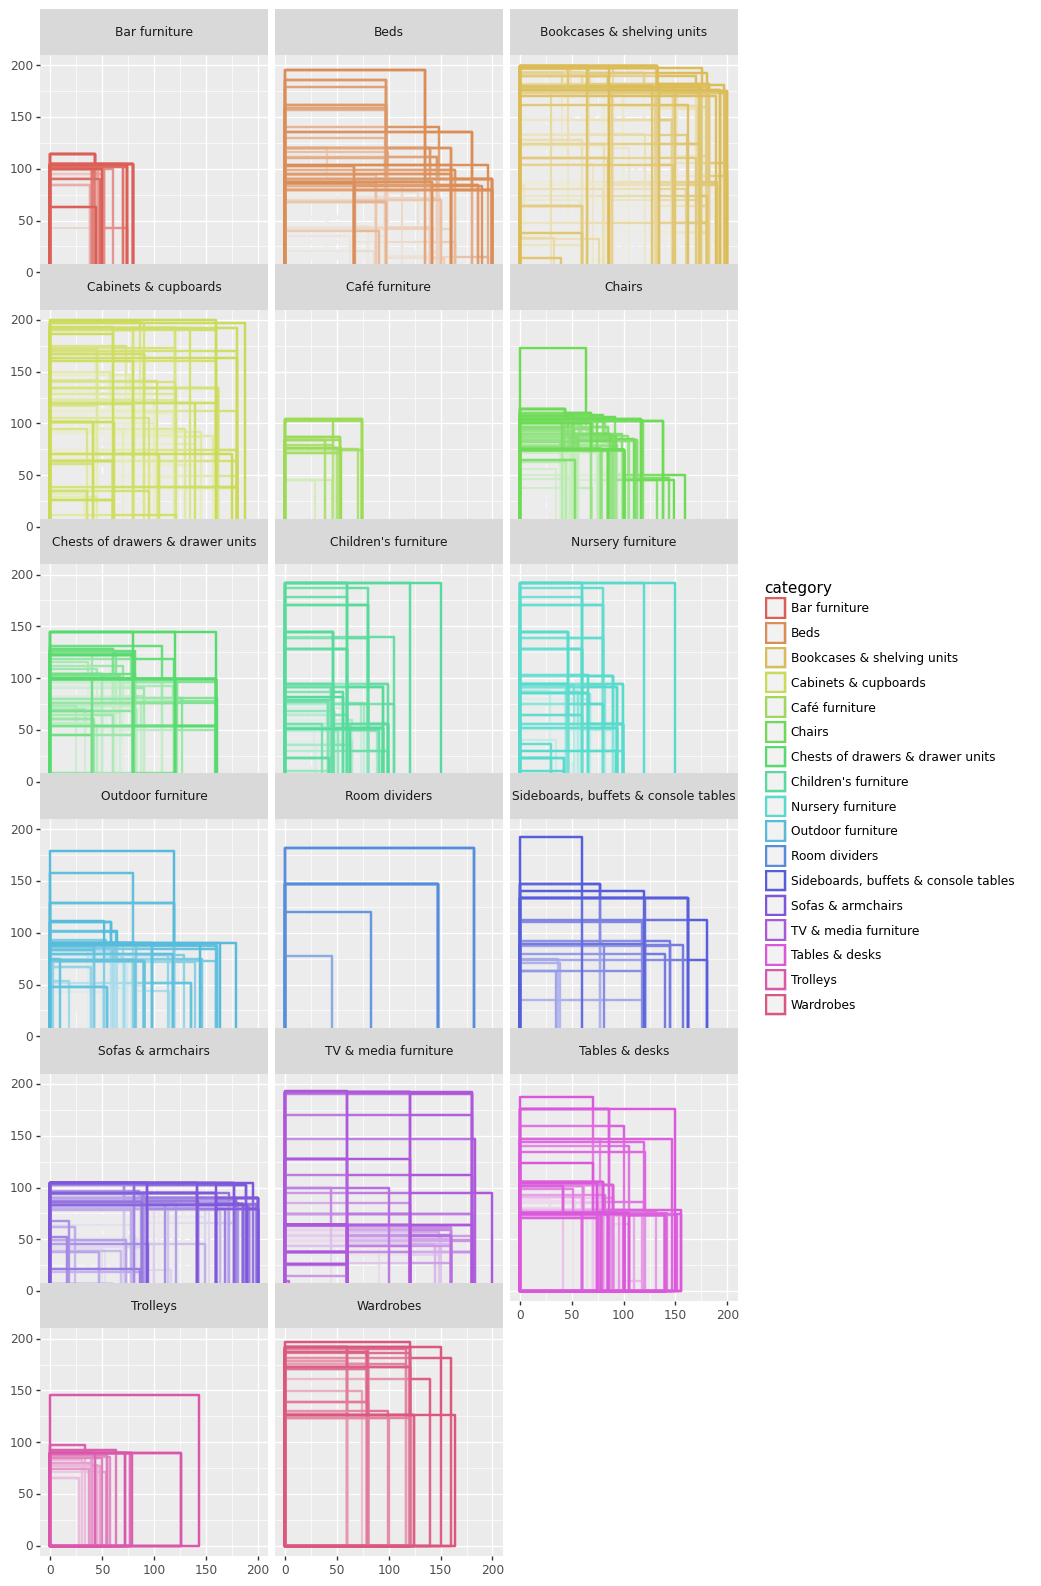

<ggplot: (156710558645)>

In [34]:
ggplot(df, aes(xmin = 0, ymin = 0, xmax = 'width', ymax = 'height', colour = 'category')) + \
geom_rect(alpha = 0.05, fill = "#FFFFFF", size = 1) + \
scale_x_continuous(limits = (0, 200)) + \
scale_y_continuous(limits = (0, 200)) + \
facet_wrap('category', ncol = 3) + \
guides()+ \
coord_fixed() +\
theme(figure_size=(9, 9)) 

In [37]:
# import matplotlib.pyplot as plt

# # create figure and axes
# fig, ax = plt.subplots(figsize=(9, 9))

# # loop through unique categories and plot rectangles
# for category in df['category'].unique():
#     category_df = df[df['category']==category]
#     for i, row in category_df.iterrows():
#         ax.add_patch(plt.Rectangle((row['xmin'], row['ymin']), row['width'], row['height'], fill=None, edgecolor=row['colour'], linewidth=1, alpha=0.05))

# # set axis limits
# ax.set_xlim([0, 200])
# ax.set_ylim([0, 200])

# # set facet labels
# facet_labels = df['category'].unique()
# axs = fig.subplots(len(facet_labels), 1, sharex=True)
# for ax, label in zip(axs.flat, facet_labels):
#     ax.set(title=label)

# # set aspect ratio
# ax.set_aspect('equal')

# # show plot
# plt.show()


In [ ]:
# Nice, looks like each category have almost similar shapes
# now let's count the valid (not null) values of each measure

C:\Users\it-it\anaconda3\lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_rect : Removed 1640 rows containing missing values.


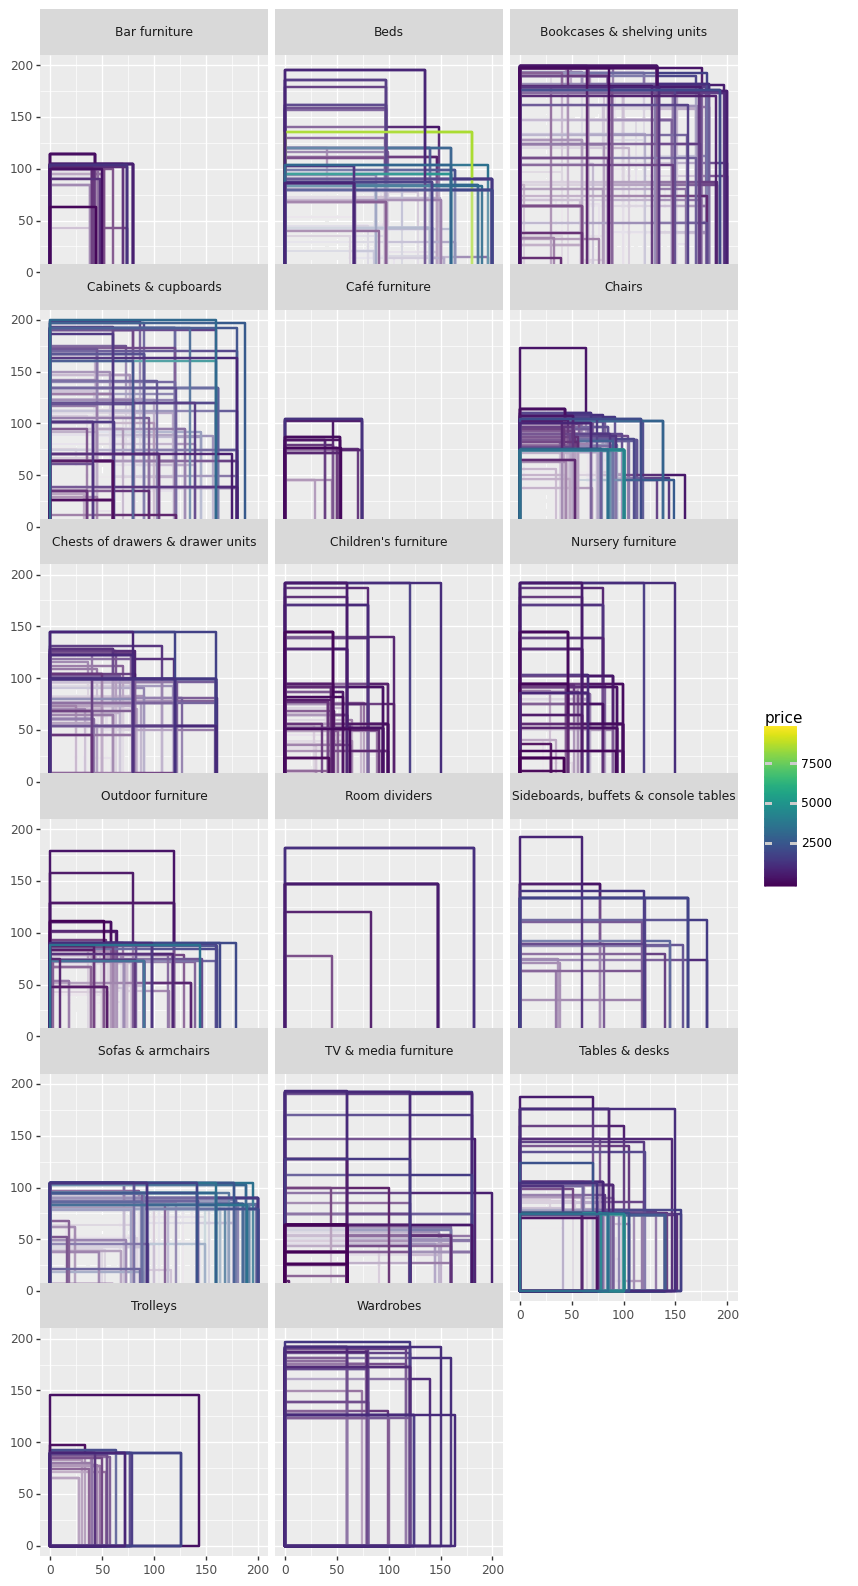

<ggplot: (156714278849)>

In [38]:
ggplot(df, aes(xmin = 0, ymin = 0, xmax = 'width', ymax = 'height', colour = 'price', size='price',  fill = 'sellable_online')) + \
geom_rect(alpha = 0.05, fill = "#FFFFFF", size = 1) + \
scale_x_continuous(limits = (0, 200)) + \
scale_y_continuous(limits = (0, 200)) + \
facet_wrap('category', ncol = 3) + \
guides()+ \
coord_fixed() +\
theme(figure_size=(9, 9)) 

In [39]:
# And here brighter colors (yellowish) means its pricer than others

In [40]:
df.groupby('category')[['width', 'height', 'depth']].apply(lambda x: x.notnull().sum())

,width,height,depth
category,,,
Bar furniture,37,35,27
Beds,185,157,83
Bookcases & shelving units,492,442,453
Cabinets & cupboards,256,230,237
Café furniture,21,22,14
Chairs,389,290,278
Chests of drawers & drawer units,125,123,121
Children's furniture,118,98,94
Nursery furniture,93,84,66


In [41]:
# some patterns found in some categories, like for example most of the Trolleys don't have depth

# now I will fill the null values with its category mean but first I will make 3 new columns indicating if it was available before or not (for other purposes)

In [42]:
df['width_d'] = (df['width'].notnull()).astype(int)
df['height_d'] = (df['height'].notnull()).astype(int)
df['depth_d'] = (df['depth'].notnull()).astype(int)
df[['width', 'height', 'depth', 'width_d', 'height_d', 'depth_d']].head(5)

,width,height,depth,width_d,height_d,depth_d
0,51.0,99.0,NaN,1,1,0
1,80.0,105.0,NaN,1,1,0
2,NaN,NaN,NaN,0,0,0
3,60.0,100.0,50.0,1,1,1
4,74.0,43.0,60.0,1,1,1


In [43]:
df[['width', 'height', 'depth']] = df.groupby(['category'])['width', 'height', 'depth'].transform(lambda x: x.fillna(x.mean()))

C:\Users\it-it\AppData\Local\Temp\ipykernel_10372\1058220307.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [44]:
df.groupby('category')[['width', 'height', 'depth']].apply(lambda x: x.notnull().sum())

,width,height,depth
category,,,
Bar furniture,47,47,47
Beds,208,208,208
Bookcases & shelving units,548,548,548
Cabinets & cupboards,292,292,292
Café furniture,26,26,26
Chairs,481,481,481
Chests of drawers & drawer units,125,125,125
Children's furniture,124,124,124
Nursery furniture,97,97,97


In [45]:
# Dropping unused columns and the 10 weird old_price's raw¶


In [46]:
cols = ['item_id', 'name','link', 'short_description',
        'designer']
df2 = df.drop(cols, axis=1)
df2.columns

Index(['category', 'price', 'old_price', 'sellable_online', 'other_colors',
       'depth', 'height', 'width', 'discounted', 'width_d', 'height_d',
       'depth_d'],
      dtype='object')

In [47]:
df2.isna().sum()

category            0
price               0
old_price          10
sellable_online     0
other_colors        0
depth               0
height              0
width               0
discounted          0
width_d             0
height_d            0
depth_d             0
dtype: int64

In [48]:
df2.dropna(inplace=True)
df2.isna().sum()

category           0
price              0
old_price          0
sellable_online    0
other_colors       0
depth              0
height             0
width              0
discounted         0
width_d            0
height_d           0
depth_d            0
dtype: int64

In [49]:
df2.head()

,category,price,old_price,sellable_online,other_colors,depth,height,width,discounted,width_d,height_d,depth_d
0,Bar furniture,265.0,265.0,True,No,46.925926,99.000000,51.000000,0,1,1,0
1,Bar furniture,995.0,995.0,False,No,46.925926,105.000000,80.000000,0,1,1,0
2,Bar furniture,2095.0,2095.0,False,No,46.925926,97.571429,52.945946,0,0,0,0
3,Bar furniture,69.0,69.0,True,Yes,50.000000,100.000000,60.000000,0,1,1,1
4,Bar furniture,225.0,225.0,True,No,60.000000,43.000000,74.000000,0,1,1,1


In [50]:
# Exploratory Data Analysis
# now after we did our cleaning, let's look at the data and look for any interesting insights
# Univariate Exploration¶

<AxesSubplot:xlabel='count', ylabel='category'>

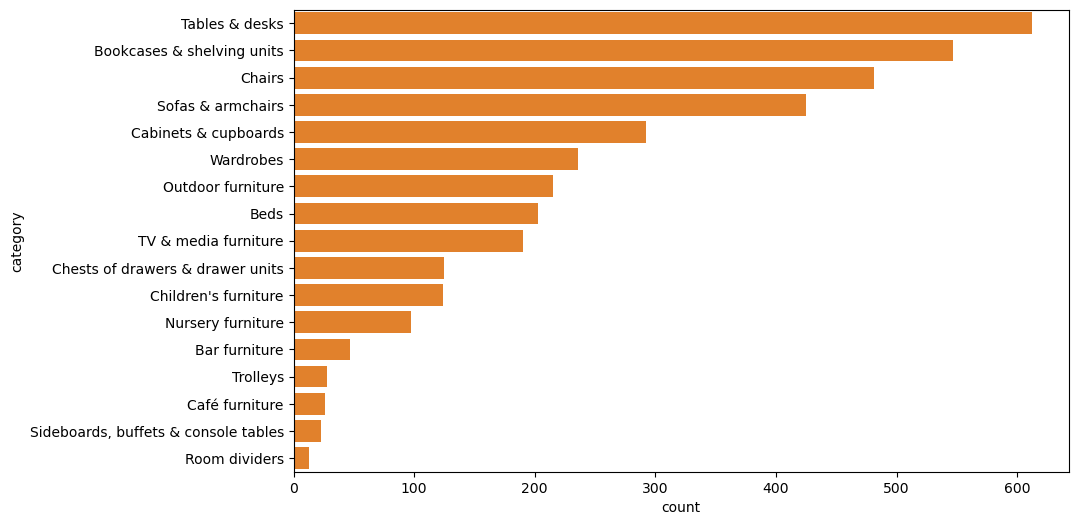

In [51]:
order = df['category'].value_counts().index
color0 = sns.color_palette()[0]
color1 = sns.color_palette()[1]

plt.figure(figsize=[10, 6])


sns.countplot(data=df2, y='category', order=order, color=color1)

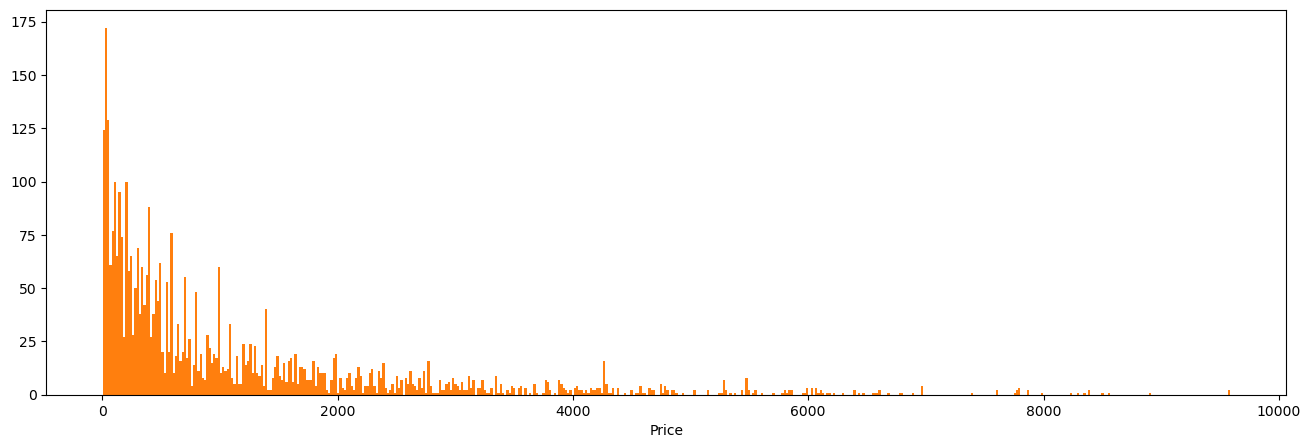

In [52]:
binsize = 500

plt.figure(figsize=[16, 5])
plt.hist(data=df2, x='price',bins=binsize, color=color1)

plt.xlabel('Price');

In [53]:
# price looks kinda log shape, lets zome in a little bit


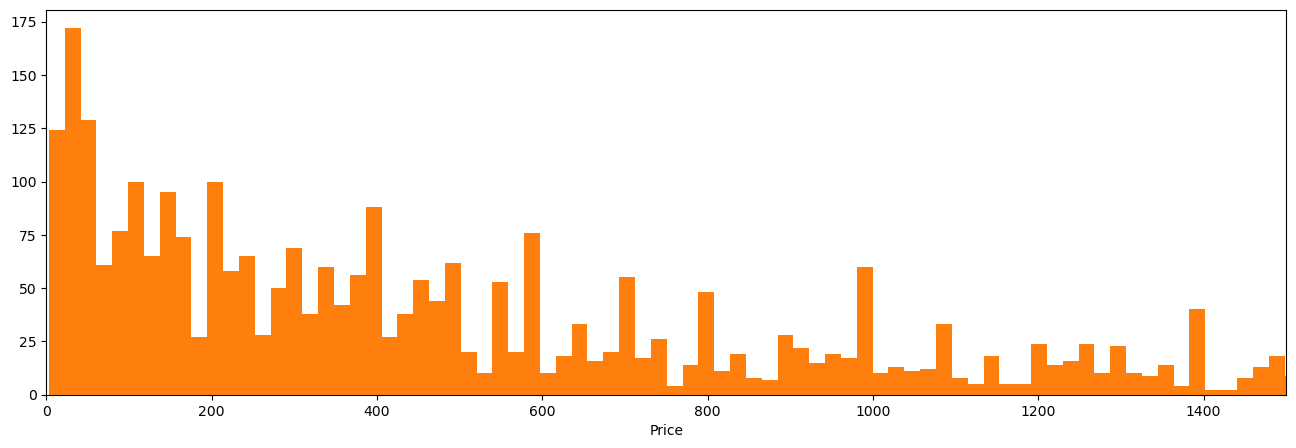

In [54]:
binsize = 500

plt.figure(figsize=[16, 5])
plt.hist(data=df2, x='price',bins=binsize, color=color1)
plt.xlim(0,1500)

plt.xlabel('Price');

In [55]:
# looks like there is a peak in prices every 100 SR and much noticeable at the 1000 SR mark


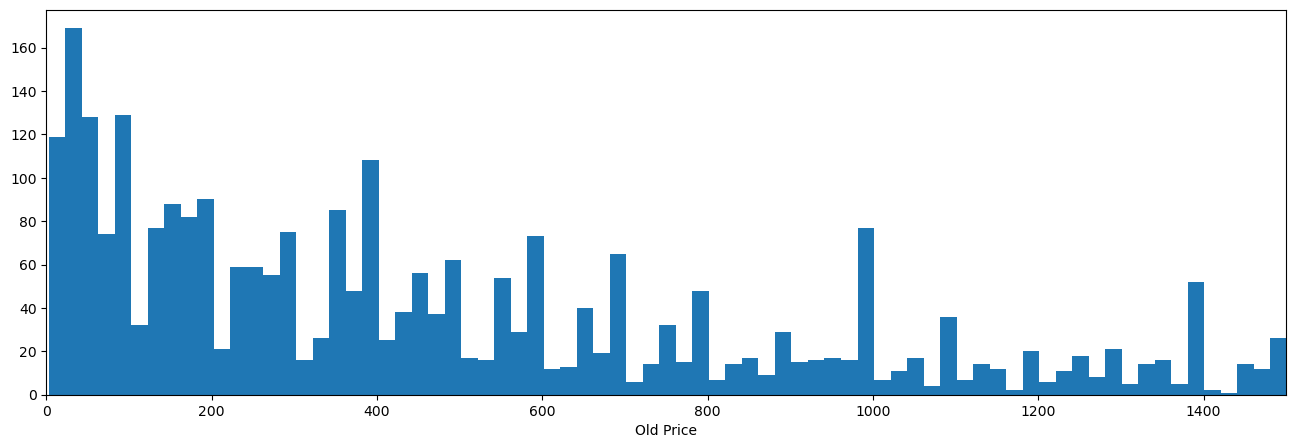

In [56]:
binsize = 500

plt.figure(figsize=[16, 5])
plt.hist(data=df2, x='old_price',bins=binsize, color=color0)
plt.xlim(0,1500)

plt.xlabel('Old Price');

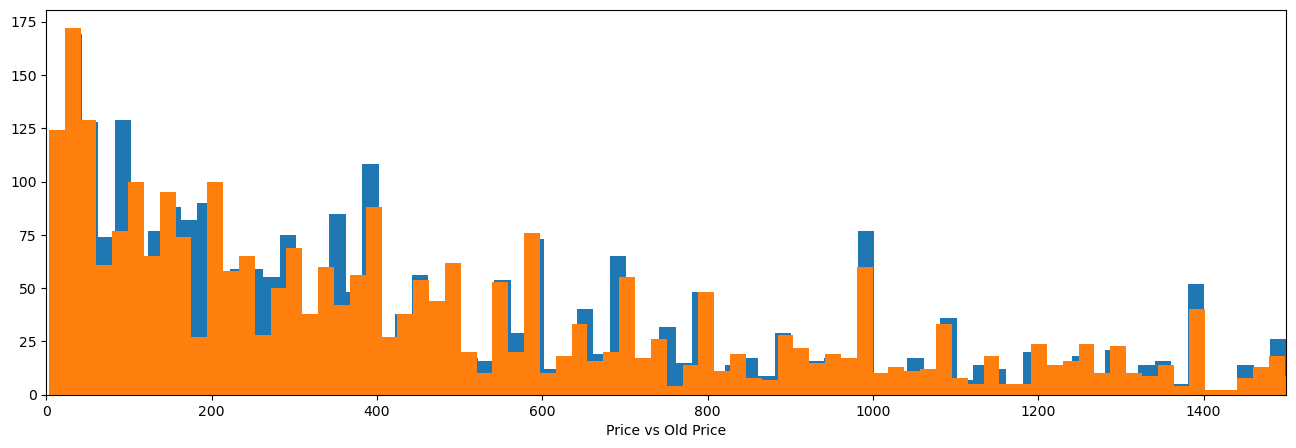

In [57]:
binsize = 500

plt.figure(figsize=[16, 5])
plt.hist(data=df2, x='old_price',bins=binsize)
plt.hist(data=df2, x='price',bins=binsize)

plt.xlim(0,1500)

plt.xlabel('Price vs Old Price');

In [58]:
# old price as expected follow the price shape


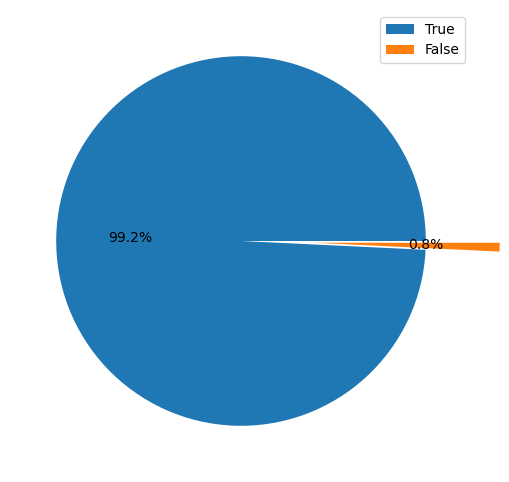

In [59]:
selable_online_count = df2['sellable_online'].value_counts()

plt.figure(figsize=[6, 6])
explode = (0, 0.4)

plt.pie(selable_online_count, explode=explode, autopct='%1.1f%%');
plt.legend(df2['sellable_online'].unique())

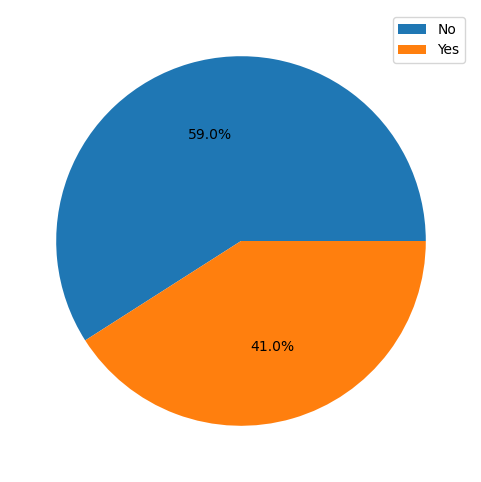

In [60]:
other_colors_count = df2['other_colors'].value_counts()

plt.figure(figsize=[6, 6])
explode = (0, 0.1)

plt.pie(other_colors_count, autopct='%1.1f%%')
plt.legend(df2['other_colors'].unique());


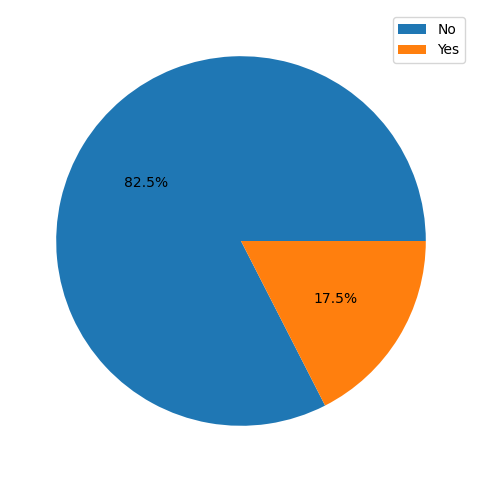

In [61]:
other_colors_count = df2['discounted'].value_counts()

plt.figure(figsize=[6, 6])
explode = (0, 0.1)

plt.pie(other_colors_count, autopct='%1.1f%%')
plt.legend(df2['other_colors'].unique());

In [62]:
# here we see that most items are sellable online (99.2)
# and only 40% of items have other colors

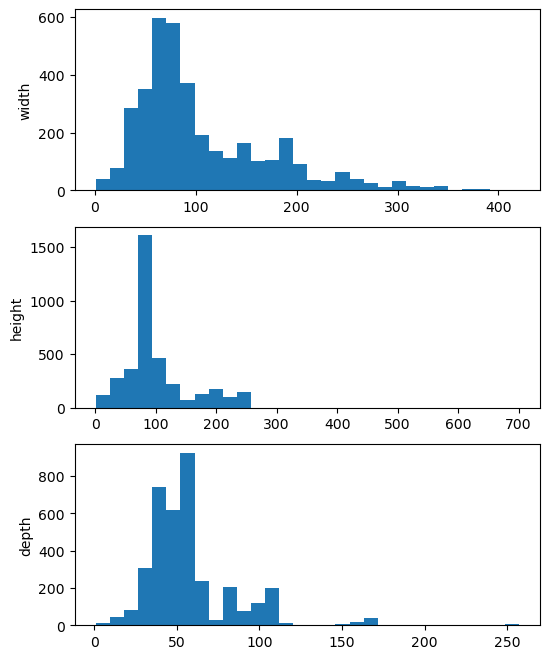

In [63]:
binsize = 30

measures = ['width', 'height', 'depth']

fig, ax = plt.subplots(nrows=3, figsize = [6,8])
for index, measure in enumerate(measures): 
    ax[index].hist(data=df2, x=measure, bins=binsize, color=color0)
    ax[index].set_ylabel(measure);
    ax[index].set_xlabel('');

In [64]:
# Bivariate Exploration
# 1. Price vs Old Price

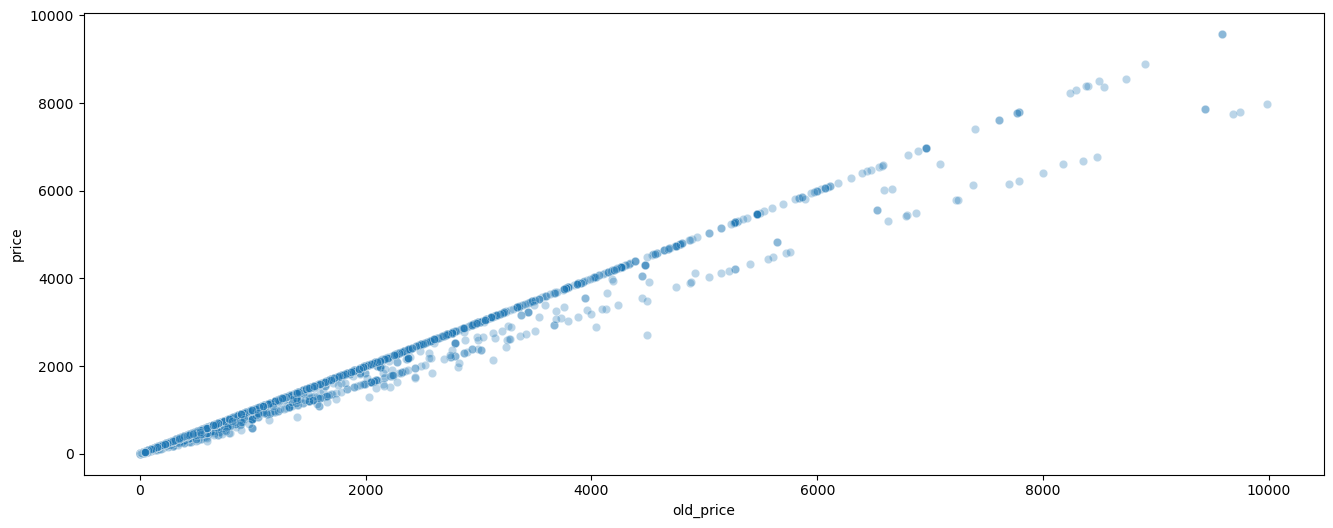

In [65]:
plt.figure(figsize=[16, 6])

sns.scatterplot(data=df2, x="old_price", y="price", alpha=0.3);

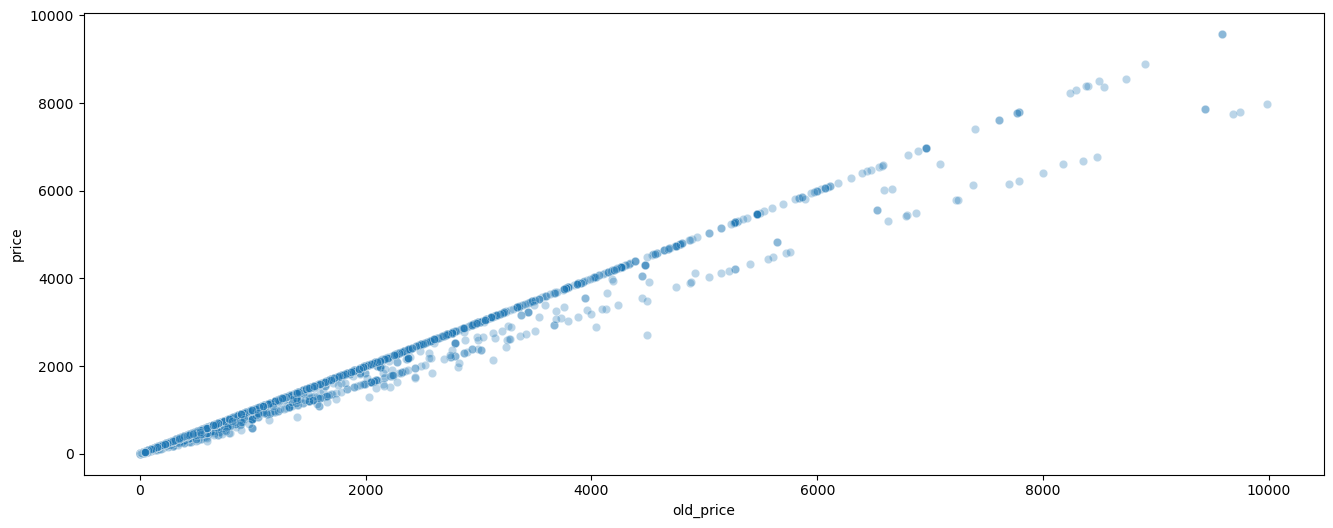

In [66]:
plt.figure(figsize=[16, 6])

sns.scatterplot(data=df2, x="old_price", y="price", alpha=0.3);

In [67]:
# interesting relation between old price and price, here we can see a linear increase in the value of discounts the more the price increases
# maybe we can see more if we look at the relation between prices and the discount amount

<AxesSubplot:xlabel='price', ylabel='discount_amount'>

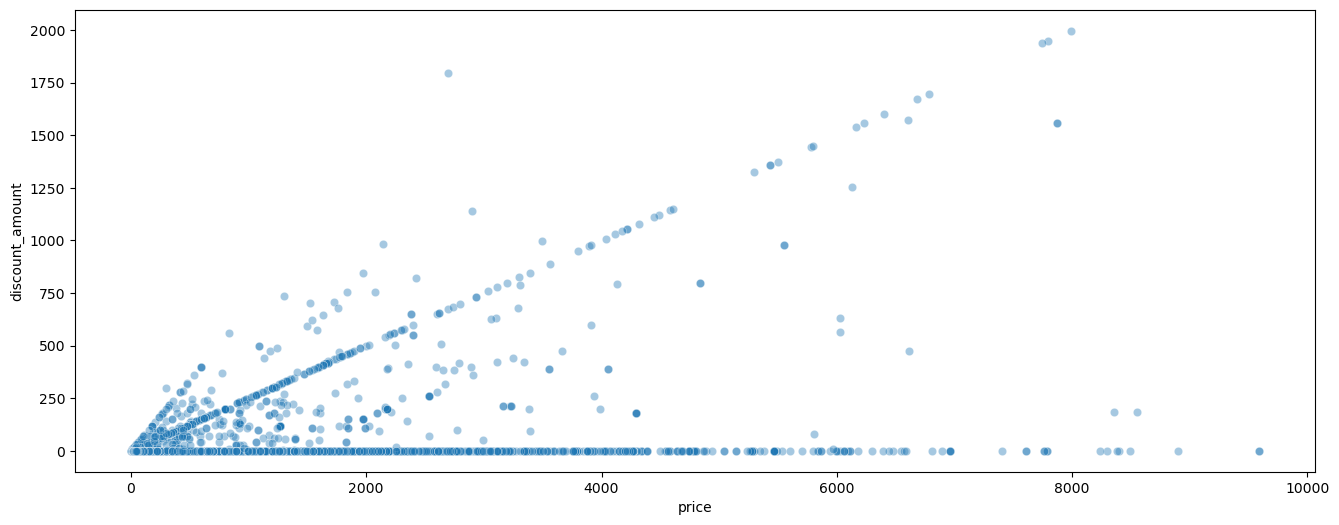

In [68]:
plt.figure(figsize=[16, 6])

df2['discount_amount'] = df2['old_price'] - df2['price']

sns.scatterplot(data=df2, x="price", y="discount_amount", alpha=0.4)

<AxesSubplot:xlabel='price', ylabel='discount_amount'>

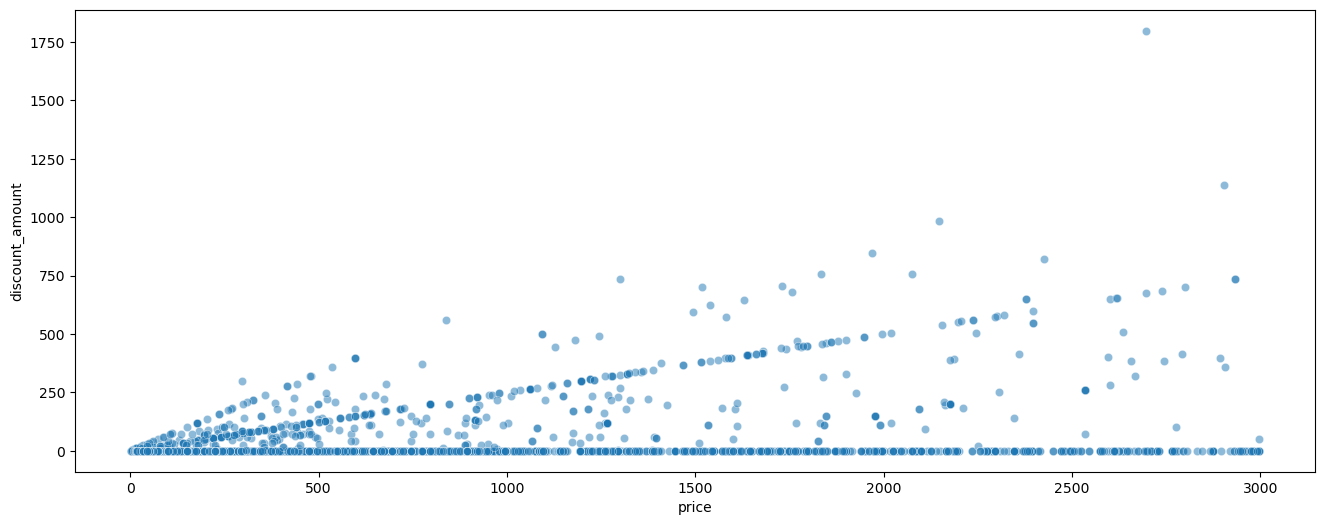

In [69]:
plt.figure(figsize=[16, 6])

sns.scatterplot(data=df2.query('price < 3000'), x="price", y="discount_amount", alpha=0.5)

In [70]:
# from this visualization, we found:
# most of the items don't have any discount on it
# for low prices there is two line relations, one that shares the same line with the high prices and one limited only for low prices
# this relation is roughly 25% discount
# items from 8k to 10k SR don't have any discount that follows this relation, 200 SR discount only
# 2. Price vs Categorical Variables

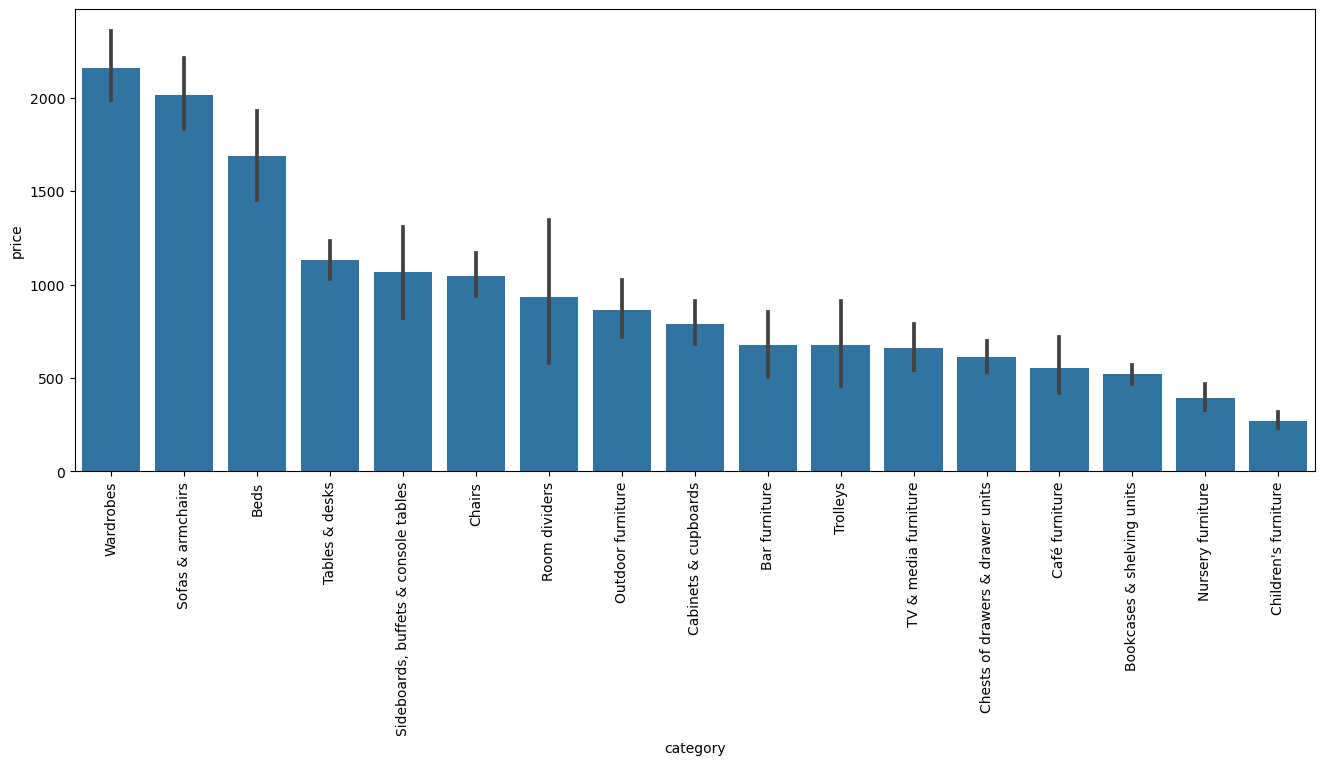

In [71]:
plt.figure(figsize=[16, 6])
result = df.groupby(["category"])['price'].aggregate(np.mean).reset_index().sort_values('price', ascending=False)

sns.barplot(data=df2, y='price', x='category', color=color0, order=result['category'])

plt.xticks(rotation=90);


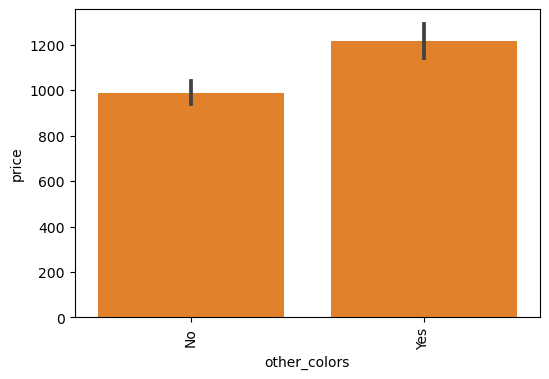

In [72]:
plt.figure(figsize=[6, 4])

sns.barplot(data=df2, y='price', x='other_colors', color=color1)
plt.xticks(rotation=90);

In [73]:
# items with other colors are more expensive

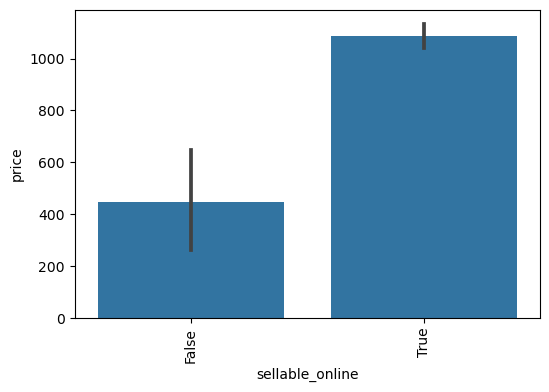

In [74]:
plt.figure(figsize=[6, 4])

sns.barplot(data=df2, y='price', x='sellable_online', color=color0)
plt.xticks(rotation=90);

In [75]:
# items that are sellable online are more expensive than those are local only


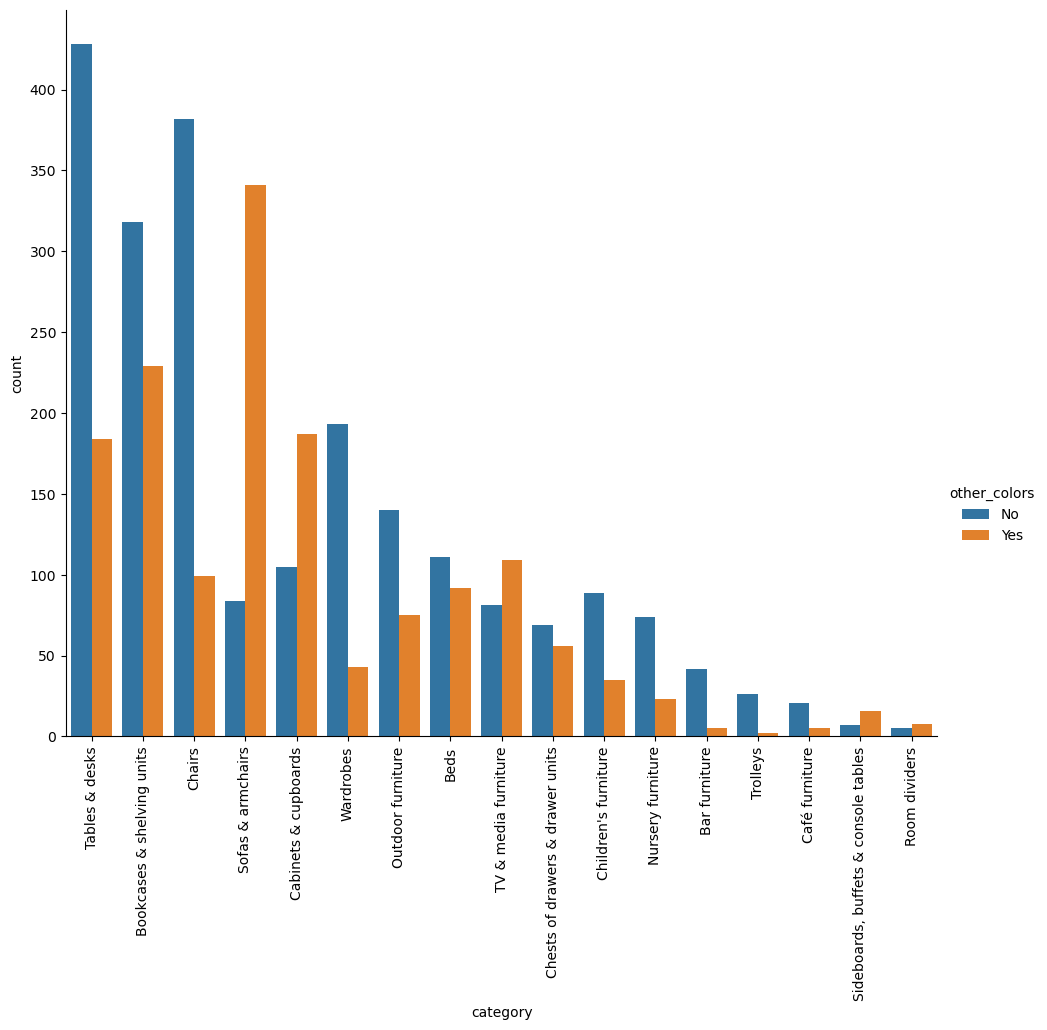

In [76]:
order = df['category'].value_counts().index

sns.catplot(data=df2, x="category", hue='other_colors', kind="count", order=order, height=8, aspect=12/10)

plt.xticks(rotation=90);

In [77]:
# Measures vs Price¶


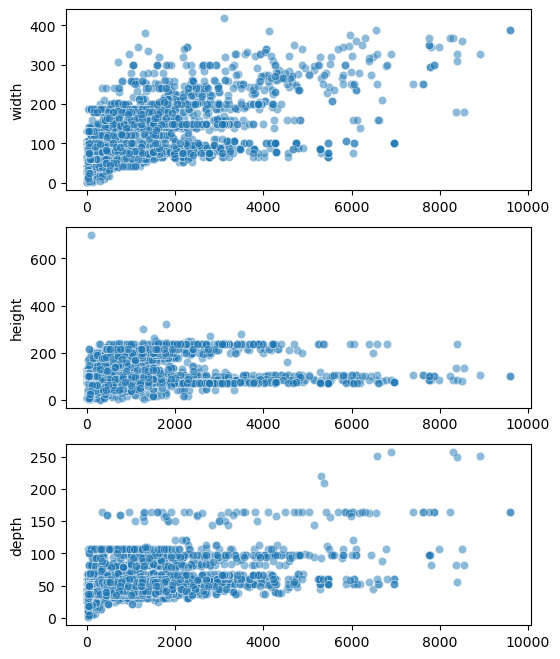

In [78]:
binsize = 30

measures = ['width', 'height', 'depth']

fig, ax = plt.subplots(nrows=3, figsize = [6,8])
for index, measure in enumerate(measures): 
    sns.scatterplot(data=df2, x="price", y=measure, alpha=0.5, ax = ax[index])
    ax[index].set_ylabel(measure);
    ax[index].set_xlabel('');

In [79]:
df2['size'] = (np.where(df2['depth_d'] == 1, df2['depth'],1)) *\
(np.where(df2['width_d'] == 1, df2['width'],1)) *\
(np.where(df2['height_d'] == 1, df2['height'],1))


df2[['size', 'width', 'height', 'depth', 'width_d', 'height_d', 'depth_d']].head(10)

,size,width,height,depth,width_d,height_d,depth_d
0,5049.0,51.000000,99.000000,46.925926,1,1,0
1,8400.0,80.000000,105.000000,46.925926,1,1,0
2,1.0,52.945946,97.571429,46.925926,0,0,0
3,300000.0,60.000000,100.000000,50.000000,1,1,1
4,190920.0,74.000000,43.000000,60.000000,1,1,1
5,163800.0,40.000000,91.000000,45.000000,1,1,1
6,209000.0,50.000000,95.000000,44.000000,1,1,1
7,2500.0,50.000000,97.571429,50.000000,1,0,1
8,209000.0,50.000000,95.000000,44.000000,1,1,1
9,1.0,52.945946,97.571429,46.925926,0,0,0


<AxesSubplot:xlabel='price', ylabel='size'>

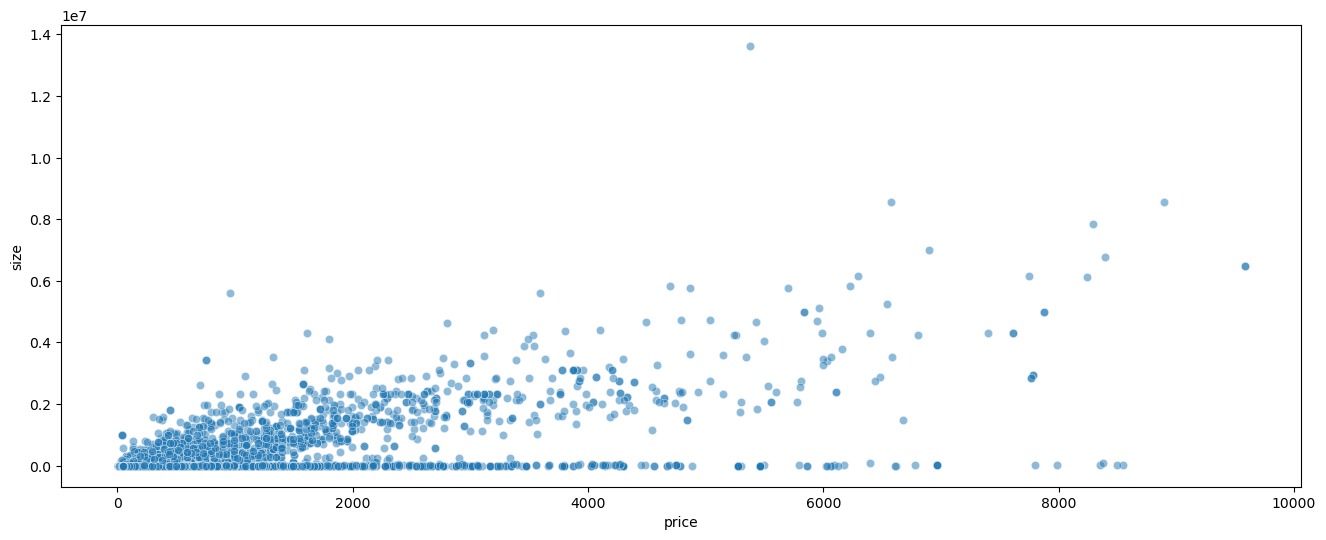

In [80]:
plt.figure(figsize=[16, 6])

sns.scatterplot(data=df2, x="price", y="size", alpha=0.5)

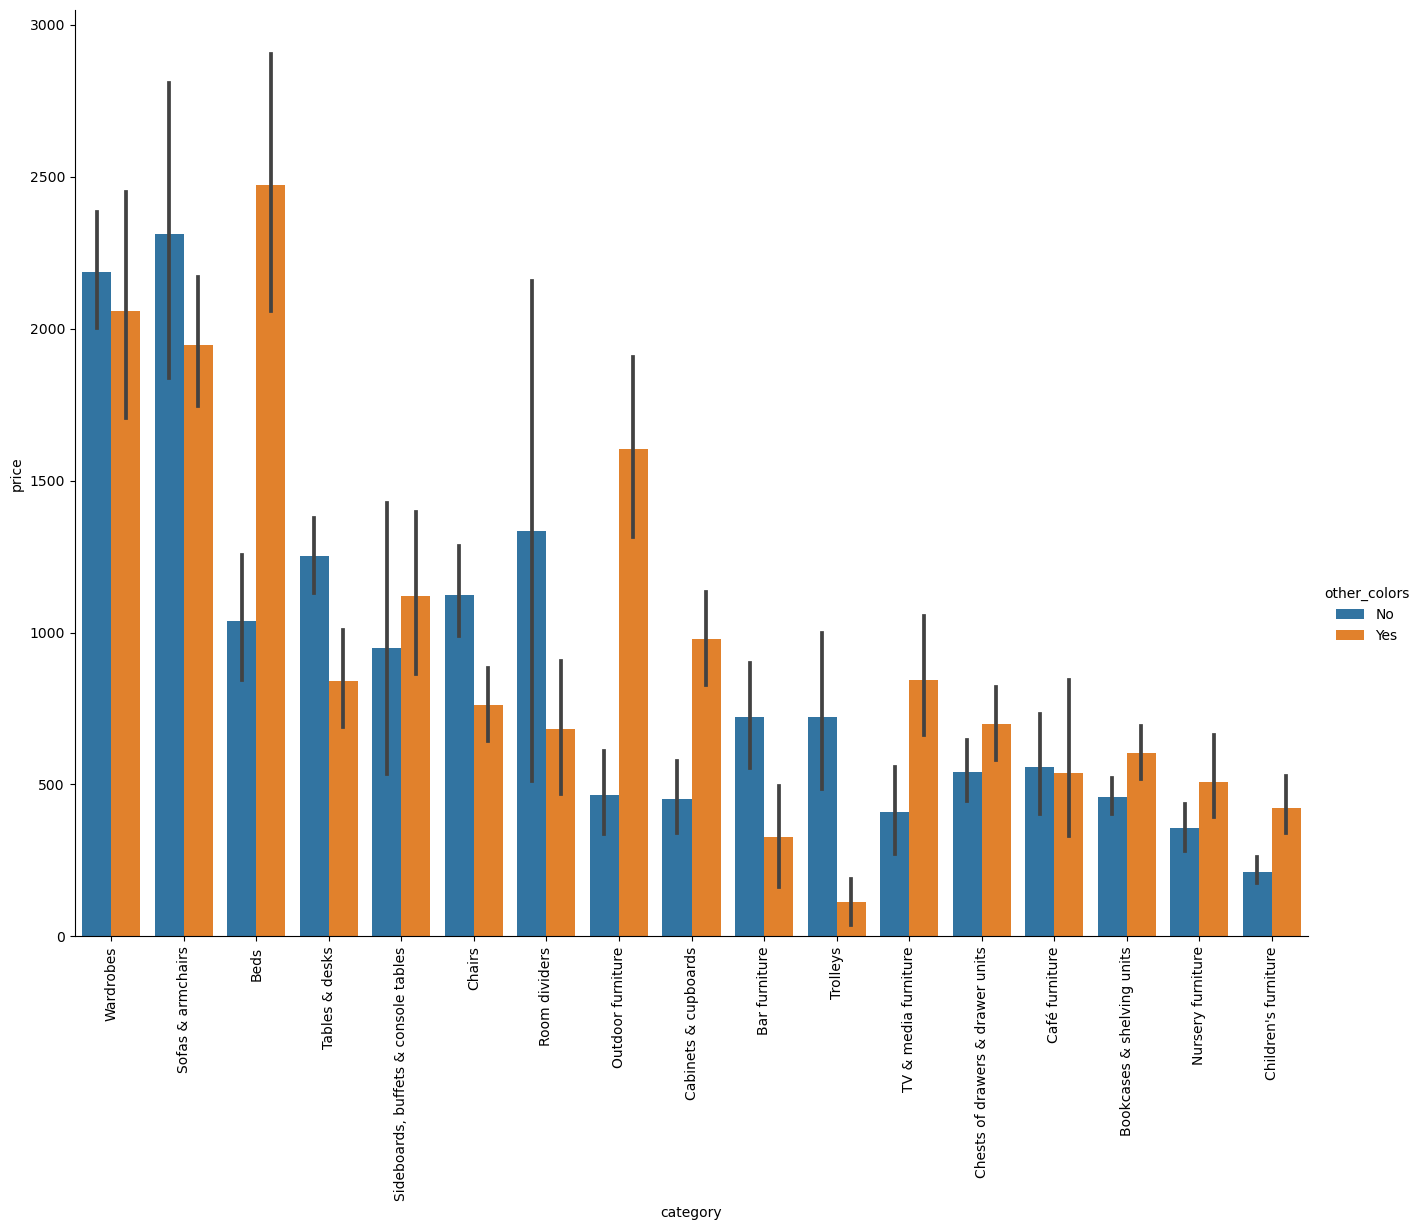

In [81]:
result = df.groupby(["category"])['price'].aggregate(np.mean).reset_index().sort_values('price', ascending=False)

sns.catplot(data=df2, x="category", hue='other_colors', kind="bar", y='price', order=result['category'], height=10, aspect=12/9)

plt.xticks(rotation=90);

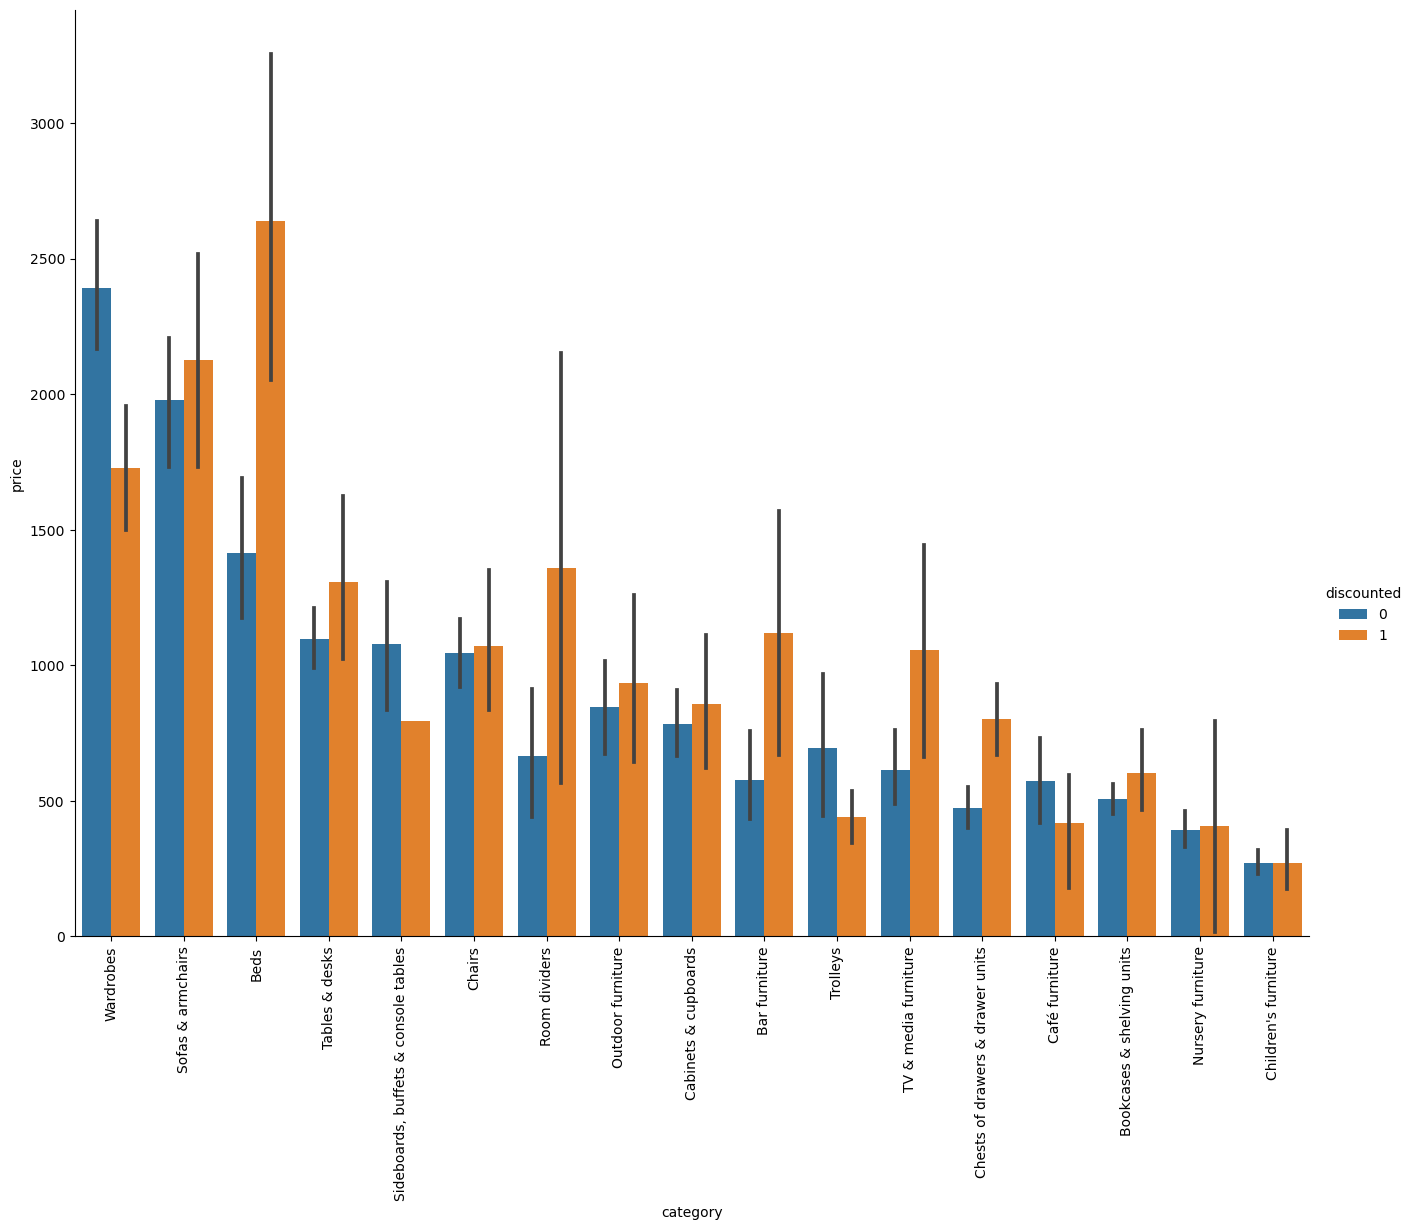

In [82]:
result = df.groupby(["category"])['price'].aggregate(np.mean).reset_index().sort_values('price', ascending=False)

sns.catplot(data=df2, x="category", hue='discounted', kind="bar", y='price', order=result['category'], height=10, aspect=12/9)

plt.xticks(rotation=90);

<AxesSubplot:xlabel='width', ylabel='height'>

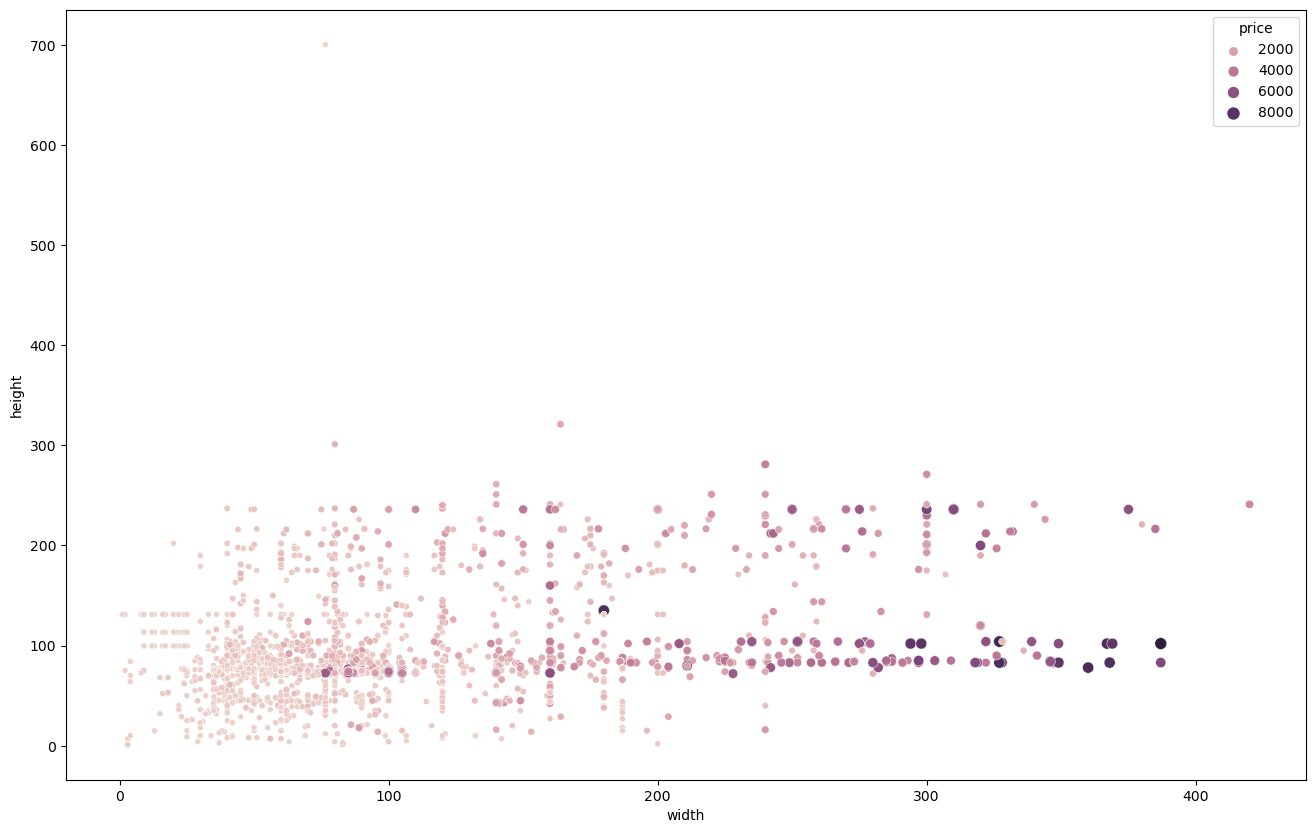

In [83]:
plt.figure(figsize=[16, 10])

sns.scatterplot(data=df2, x="width", y="height", size='price', hue='price')

In [84]:
df2.head()


,category,price,old_price,sellable_online,other_colors,depth,height,width,discounted,width_d,height_d,depth_d,discount_amount,size
0,Bar furniture,265.0,265.0,True,No,46.925926,99.000000,51.000000,0,1,1,0,0.0,5049.0
1,Bar furniture,995.0,995.0,False,No,46.925926,105.000000,80.000000,0,1,1,0,0.0,8400.0
2,Bar furniture,2095.0,2095.0,False,No,46.925926,97.571429,52.945946,0,0,0,0,0.0,1.0
3,Bar furniture,69.0,69.0,True,Yes,50.000000,100.000000,60.000000,0,1,1,1,0.0,300000.0
4,Bar furniture,225.0,225.0,True,No,60.000000,43.000000,74.000000,0,1,1,1,0.0,190920.0


In [85]:
df2.to_csv('clean_IKEA_dataset.csv', index=False)

In [86]:
# Conclusions

# Imports and preperations

In [87]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import utils

In [88]:
df = df2.copy()
df.head()

,category,price,old_price,sellable_online,other_colors,depth,height,width,discounted,width_d,height_d,depth_d,discount_amount,size
0,Bar furniture,265.0,265.0,True,No,46.925926,99.000000,51.000000,0,1,1,0,0.0,5049.0
1,Bar furniture,995.0,995.0,False,No,46.925926,105.000000,80.000000,0,1,1,0,0.0,8400.0
2,Bar furniture,2095.0,2095.0,False,No,46.925926,97.571429,52.945946,0,0,0,0,0.0,1.0
3,Bar furniture,69.0,69.0,True,Yes,50.000000,100.000000,60.000000,0,1,1,1,0.0,300000.0
4,Bar furniture,225.0,225.0,True,No,60.000000,43.000000,74.000000,0,1,1,1,0.0,190920.0


In [89]:
scaler = MinMaxScaler()

df[['size', 'width', 'height', 'depth', 'discount_amount','price']] = scaler.fit_transform(df[['size', 'width', 'height', 'depth', 'discount_amount','price']])
df.head()

,category,price,old_price,sellable_online,other_colors,depth,height,width,discounted,width_d,height_d,depth_d,discount_amount,size
0,Bar furniture,0.027343,265.0,True,No,0.179398,0.140200,0.119332,0,1,1,0,0.0,0.000370
1,Bar furniture,0.103527,995.0,False,No,0.179398,0.148784,0.188544,0,1,1,0,0.0,0.000616
2,Bar furniture,0.218326,2095.0,False,No,0.179398,0.138157,0.123976,0,0,0,0,0.0,0.000000
3,Bar furniture,0.006888,69.0,True,Yes,0.191406,0.141631,0.140811,0,1,1,1,0.0,0.022012
4,Bar furniture,0.023168,225.0,True,No,0.230469,0.060086,0.174224,0,1,1,1,0.0,0.014008


In [90]:
# encode class values as integers
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(df.category)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = utils.to_categorical(encoded_Y)

In [91]:
df_train , df_test, dummy_y_train, dummy_y_test = train_test_split(df, dummy_y, shuffle=True, test_size=0.3)

In [92]:
# Model 1: Item's price prediction¶


In [93]:
feature_columns = []

discount_amount = tf.feature_column.numeric_column("discount_amount")
feature_columns.append(discount_amount)

size = tf.feature_column.numeric_column("size")
feature_columns.append(size)

width = tf.feature_column.numeric_column("width")
feature_columns.append(width)

height = tf.feature_column.numeric_column("height")
feature_columns.append(height)

depth = tf.feature_column.numeric_column("depth")
feature_columns.append(depth)

width_d = tf.feature_column.numeric_column("width_d")
feature_columns.append(width_d)

height_d = tf.feature_column.numeric_column("height_d")
feature_columns.append(height_d)

depth_d = tf.feature_column.numeric_column("depth_d")
feature_columns.append(depth_d)

other_colors = tf.feature_column.categorical_column_with_vocabulary_list(
    key='other_colors', vocabulary_list=('Yes', 'No'), default_value=0)
feature_columns.append(tf.feature_column.indicator_column(other_colors))

category = tf.feature_column.categorical_column_with_vocabulary_list(
    key='category', vocabulary_list=('Bar furniture', 'Beds', 'Bookcases & shelving units',
                                     'Cabinets & cupboards', 'Café furniture', 'Chairs',
                                     'Chests of drawers & drawer units', "Children's furniture",
                                     'Nursery furniture', 'Outdoor furniture', 'Room dividers',
                                     'Sideboards, buffets & console tables', 'Sofas & armchairs',
                                     'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'),
    default_value=0)
feature_columns.append(tf.feature_column.indicator_column(category))

my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [94]:
#@title Define the plotting function.

def plot_the_loss_curve(epochs, mse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(epochs, mse, label="Loss")
  plt.legend()
  plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [95]:
def create_model(my_learning_rate, my_feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(my_feature_layer)

  # Describe the topography of the model by calling the tf.keras.layers.Dense
  # method once for each layer. We've specified the following arguments:
  #   * units specifies the number of nodes in this layer.
  #   * activation specifies the activation function (Rectified Linear Unit).
  #   * name is just a string that can be useful when debugging.

  # Define the first hidden layer with 20 nodes.   
  model.add(tf.keras.layers.Dense(units=20, 
                                  activation='relu', 
                                  kernel_regularizer=tf.keras.regularizers.l2(l=0.0),
                                  name='Hidden1'))
  
  # Define the second hidden layer with 10 nodes. 
  model.add(tf.keras.layers.Dense(units=10, 
                                  activation='relu', 
                                  kernel_regularizer=tf.keras.regularizers.l2(l=0.0),
                                  name='Hidden2'))

  
  # Define the output layer.
  model.add(tf.keras.layers.Dense(units=1,  
                                  name='Output'))                              
  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

  return model


def train_model(model, dataset, epochs, label_name,
                batch_size=None):
  """Train the model by feeding it data."""

  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True) 

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # To track the progression of training, gather a snapshot
  # of the model's mean squared error at each epoch. 
  hist = pd.DataFrame(history.history)
  mse = hist["mean_squared_error"]

  return epochs, mse

Epoch 1/20


1289/1289 [==============================] - 4s 2ms/step - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 2/20
1289/1289 [==============================] - 3s 2ms/step - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 3/20
1289/1289 [==============================] - 3s 2ms/step - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 4/20
1289/1289 [==============================] - 3s 2ms/step - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 5/20
1289/1289 [==============================] - 3s 2ms/step - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 6/20
1289/1289 [==============================] - 3s 2ms/step - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 7/20
1289/1289 [==============================] - 3s 2ms/step - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 8/20
1289/1289 [==============================] - 3s 2ms/step - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 9/20
1289/1289 [==============================] - 3s 2ms/step - loss: 0.0069 - mean_squared_error: 0.0069
Epo

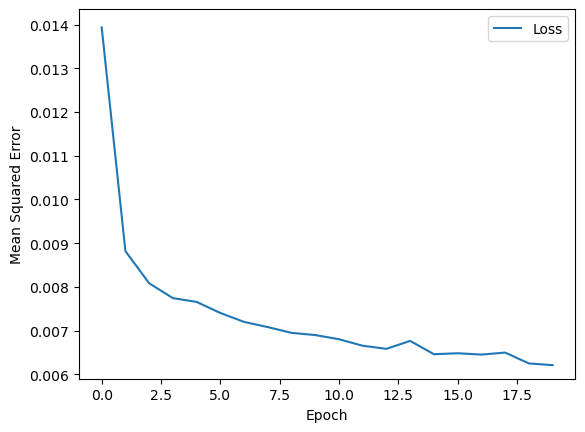


 Evaluate the new model against the test set:


553/553 [==============================] - 2s 2ms/step - loss: 0.0068 - mean_squared_error: 0.0068


[0.006765502039343119, 0.006765502039343119]

In [96]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 20
batch_size = 2


# Specify the label
label_name = "price"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined by the feature_layer.
epochs, mse = train_model(my_model, df_train, epochs, 
                          label_name, batch_size)
plot_the_loss_curve(epochs, mse)

# After building a model against the training set, test that model
# against the test set.
test_features = {name:np.array(value) for name, value in df_test.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)

In [97]:
# Model 2: Category classifier

In [98]:
feature_columns = []

price = tf.feature_column.numeric_column("price")
feature_columns.append(price)

discount_amount = tf.feature_column.numeric_column("discount_amount")
feature_columns.append(discount_amount)

size = tf.feature_column.numeric_column("size")
feature_columns.append(size)

width = tf.feature_column.numeric_column("width")
feature_columns.append(width)

height = tf.feature_column.numeric_column("height")
feature_columns.append(height)

depth = tf.feature_column.numeric_column("depth")
feature_columns.append(depth)

width_d = tf.feature_column.numeric_column("width_d")
feature_columns.append(width_d)

height_d = tf.feature_column.numeric_column("height_d")
feature_columns.append(height_d)

depth_d = tf.feature_column.numeric_column("depth_d")
feature_columns.append(depth_d)

other_colors = tf.feature_column.categorical_column_with_vocabulary_list(
    key='other_colors', vocabulary_list=('Yes', 'No'), default_value=0)
feature_columns.append(tf.feature_column.indicator_column(other_colors))


my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [99]:
#@title Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


In [100]:
def create_model(my_learning_rate, my_feature_layer):
  """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  # The features are stored in a two-dimensional 28X28 array. 
  # Flatten that two-dimensional array into a a one-dimensional 
  # 784-element array.
  model.add(my_feature_layer)

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(units=500, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.2))

  model.add(tf.keras.layers.Dense(units=200, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.2))

  model.add(tf.keras.layers.Dense(units=20, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.2))


  # Output Layer
  model.add(tf.keras.layers.Dense(units=17, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train_model(model, dataset, train_label, epochs,
                batch_size=None):
  """Train the model by feeding it data."""

  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))


  history = model.fit(x=features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True) 

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # To track the progression of training, gather a snapshot
  # of the model's mean squared error at each epoch. 
  hist = pd.DataFrame(history.history)

  return epochs, hist

Epoch 1/200


516/516 [==============================] - 3s 3ms/step - loss: 2.3551 - accuracy: 0.2812
Epoch 2/200
516/516 [==============================] - 2s 3ms/step - loss: 1.9507 - accuracy: 0.3743
Epoch 3/200
516/516 [==============================] - 1s 3ms/step - loss: 1.7829 - accuracy: 0.4267
Epoch 4/200
516/516 [==============================] - 1s 3ms/step - loss: 1.7049 - accuracy: 0.4445
Epoch 5/200
516/516 [==============================] - 1s 3ms/step - loss: 1.6269 - accuracy: 0.4760
Epoch 6/200
516/516 [==============================] - 1s 3ms/step - loss: 1.5936 - accuracy: 0.4763
Epoch 7/200
516/516 [==============================] - 1s 3ms/step - loss: 1.5485 - accuracy: 0.4845
Epoch 8/200
516/516 [==============================] - 1s 3ms/step - loss: 1.5075 - accuracy: 0.5008
Epoch 9/200
516/516 [==============================] - 2s 3ms/step - loss: 1.4804 - accuracy: 0.5144
Epoch 10/200
516/516 [==============================] - 1s 3ms/step - loss: 1.4458 - accuracy: 0.5322
E

516/516 [==============================] - 1s 3ms/step - loss: 0.9112 - accuracy: 0.6757
Epoch 82/200
516/516 [==============================] - 1s 3ms/step - loss: 0.9203 - accuracy: 0.6742
Epoch 83/200
516/516 [==============================] - 1s 3ms/step - loss: 0.9274 - accuracy: 0.6823
Epoch 84/200
516/516 [==============================] - 1s 3ms/step - loss: 0.8997 - accuracy: 0.6738
Epoch 85/200
516/516 [==============================] - 1s 3ms/step - loss: 0.9264 - accuracy: 0.6683
Epoch 86/200
516/516 [==============================] - 1s 3ms/step - loss: 0.9063 - accuracy: 0.6788
Epoch 87/200
516/516 [==============================] - 1s 3ms/step - loss: 0.9018 - accuracy: 0.6761
Epoch 88/200
516/516 [==============================] - 1s 3ms/step - loss: 0.9341 - accuracy: 0.6695
Epoch 89/200
516/516 [==============================] - 1s 3ms/step - loss: 0.8849 - accuracy: 0.6765
Epoch 90/200
516/516 [==============================] - 1s 3ms/step - loss: 0.9113 - accuracy: 

516/516 [==============================] - 1s 2ms/step - loss: 0.8214 - accuracy: 0.7060
Epoch 161/200
516/516 [==============================] - 1s 2ms/step - loss: 0.8411 - accuracy: 0.7025
Epoch 162/200
516/516 [==============================] - 1s 2ms/step - loss: 0.7887 - accuracy: 0.7071
Epoch 163/200
516/516 [==============================] - 1s 2ms/step - loss: 0.8305 - accuracy: 0.6932
Epoch 164/200
516/516 [==============================] - 1s 2ms/step - loss: 0.8187 - accuracy: 0.7048
Epoch 165/200
516/516 [==============================] - 1s 2ms/step - loss: 0.8190 - accuracy: 0.7052
Epoch 166/200
516/516 [==============================] - 1s 2ms/step - loss: 0.8215 - accuracy: 0.6998
Epoch 167/200
516/516 [==============================] - 1s 2ms/step - loss: 0.7996 - accuracy: 0.7067
Epoch 168/200
516/516 [==============================] - 1s 2ms/step - loss: 0.8017 - accuracy: 0.7079
Epoch 169/200
516/516 [==============================] - 1s 3ms/step - loss: 0.7878 - a

222/222 [==============================] - 1s 2ms/step - loss: 1.0108 - accuracy: 0.6989


[1.0108013153076172, 0.6989150047302246]

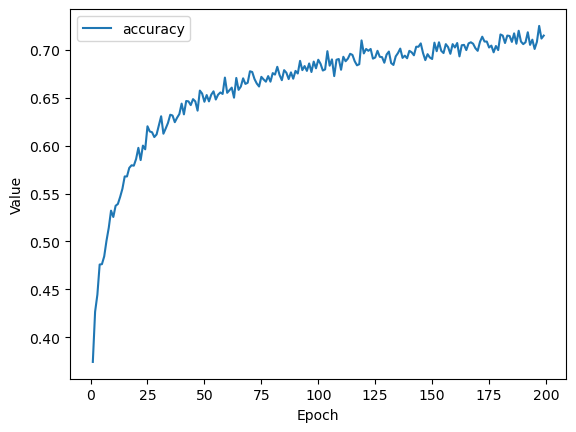

In [101]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 200
batch_size = 5


label_name = "category"
# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, df_train, dummy_y_train, 
                           epochs, batch_size)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
features = {name:np.array(value) for name, value in df_test.items()}

my_model.evaluate(x=features, y=dummy_y_test, batch_size=batch_size)